# Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_clients = pd.read_csv("Clients.csv")
df_clients.head()

,client_id,entity_type,entity_year_established
0,786,Australian Private Company,2002
1,230,Australian Private Company,2008
2,282,Individual/Sole Trader,2001
3,447,Australian Private Company,2013
4,310,Individual/Sole Trader,2015


client_id: This is a unique identifier for each client or customer in the database. It helps distinguish one 
client from another.

entity_type: This column describes the type of business or organization the client is.
    
entity_year_established: This column shows the year when the client's business or entity was officially started.

In [3]:
df_clients.shape

(1287, 3)

In [4]:
df_clients.entity_type.unique() # 10 entity types

array(['Australian Private Company', 'Individual/Sole Trader',
       'Family Partnership', 'Australian Proprietary Company',
       'Discretionary Trading Trust', 'Discretionary Investment Trust',
       'Australian Public Company', 'Other Partnership',
       'Fixed Unit Trust', 'Hybrid Trust'], dtype=object)

In [5]:
clients_df = pd.read_csv('clients.csv')

In [6]:
# Identify duplicate client_id
duplicate_client_ids = clients_df[clients_df.duplicated('client_id', keep=False)]
#print("Duplicate client IDs:")
duplicate_client_ids

,client_id,entity_type,entity_year_established
245,591,Australian Private Company,2013
306,591,Australian Private Company,2007
332,473,Australian Private Company,2016
350,473,Individual/Sole Trader,2008
401,165,Australian Private Company,2015
816,591,Australian Private Company,2015
1063,797,Discretionary Investment Trust,2016
1115,165,Individual/Sole Trader,2006
1172,1262,Australian Private Company,2005
1182,1262,Australian Private Company,2016


 There are 11 Duplicate client_id

In [7]:
duplicate_client_ids.nunique()

client_id                  5
entity_type                3
entity_year_established    8
dtype: int64

In [8]:
df_payments = pd.read_csv("Payments.csv")
df_payments.head()

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code
0,20175,927.0,1.0,1.527013e+09,66.66,PAYMENT
1,8485,927.0,1.0,1.511716e+09,66.66,PAYMENT
2,13778,927.0,1.0,1.519319e+09,66.66,PAYMENT
3,22768,927.0,1.0,1.529864e+09,66.66,PAYMENT
4,15698,927.0,1.0,1.521739e+09,66.66,PAYMENT


transaction_id: This is a unique identifier for each transaction. No two transactions will have the same transaction_id.
    
contract_id: This identifier links the transaction to a specific contract
    
transaction_date: The timestamp of when the transaction occurred. Its recorded as a Unix timestamp, which 
is the number of seconds since January 1, 1970.    

payment_amt: This is the amount of money that was transacted.
    
payment_code: This indicates the type of transaction. "PAYMENT" suggests that these are regular payments. 
Other codes might include "DEFAULT" for missed payments

In [9]:
df_payments.shape

(25562, 6)

# Merge the two files on client_id

In [10]:
df = pd.merge(df_payments, df_clients, on = "client_id")
df

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,entity_type,entity_year_established
0,20175,927.0,1.0,1.527013e+09,66.66,PAYMENT,Other Partnership,2006
1,8485,927.0,1.0,1.511716e+09,66.66,PAYMENT,Other Partnership,2006
2,13778,927.0,1.0,1.519319e+09,66.66,PAYMENT,Other Partnership,2006
3,22768,927.0,1.0,1.529864e+09,66.66,PAYMENT,Other Partnership,2006
4,15698,927.0,1.0,1.521739e+09,66.66,PAYMENT,Other Partnership,2006
...,...,...,...,...,...,...,...,...
25849,25075,1603.0,1280.0,1.532024e+09,1666.68,PAYMENT,Australian Private Company,2016
25850,24711,1603.0,1280.0,1.531765e+09,0.01,PAYMENT,Australian Private Company,2016
25851,25076,1603.0,1280.0,1.532024e+09,64.99,PAYMENT,Australian Private Company,2016
25852,25132,1627.0,1281.0,1.532283e+09,0.01,PAYMENT,Australian Private Company,2012


In [11]:
df[(df['client_id'] == 797) & (df['payment_code'] == 'DEFAULT')].head()

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,entity_type,entity_year_established
17380,11420,416.0,797.0,1.516122e+09,251.46,DEFAULT,Discretionary Investment Trust,2016
17381,11420,416.0,797.0,1.516122e+09,251.46,DEFAULT,Australian Private Company,2002
17382,11421,416.0,797.0,1.516122e+09,20.11,DEFAULT,Discretionary Investment Trust,2016
17383,11421,416.0,797.0,1.516122e+09,20.11,DEFAULT,Australian Private Company,2002
17402,8594,474.0,797.0,1.511802e+09,468.00,DEFAULT,Discretionary Investment Trust,2016


client_id = 591 have 16 DEFAULT payments, client_id = 797 have 18 DEFAULT payments, and client_id = 165, 473, 1262 doesn't have any DEFAULT payments.

# For Converting the EPOCH Date

In [12]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], unit='s')

df['day_name'] = df['transaction_date'].dt.day_name()

df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day

EPOCH Transaction_date is converted into day_name, day, month, and year

In [13]:
df.head()

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,entity_type,entity_year_established,day_name,year,month,day
0,20175,927.0,1.0,2018-05-22 18:08:31,66.66,PAYMENT,Other Partnership,2006,Tuesday,2018,5,22
1,8485,927.0,1.0,2017-11-26 17:08:15,66.66,PAYMENT,Other Partnership,2006,Sunday,2017,11,26
2,13778,927.0,1.0,2018-02-22 17:08:23,66.66,PAYMENT,Other Partnership,2006,Thursday,2018,2,22
3,22768,927.0,1.0,2018-06-24 18:08:44,66.66,PAYMENT,Other Partnership,2006,Sunday,2018,6,24
4,15698,927.0,1.0,2018-03-22 17:08:24,66.66,PAYMENT,Other Partnership,2006,Thursday,2018,3,22


# entity type and number of clients

In [14]:
# entity type and number of clients

df.groupby('entity_type')['client_id'].nunique().reset_index(name='number_of_clients')

,entity_type,number_of_clients
0,Australian Private Company,751
1,Australian Proprietary Company,1
2,Australian Public Company,6
3,Discretionary Investment Trust,3
4,Discretionary Trading Trust,12
5,Family Partnership,39
6,Fixed Unit Trust,4
7,Hybrid Trust,1
8,Individual/Sole Trader,457
9,Other Partnership,10


 The above output DataFrame shows various entity types alongside their corresponding client counts, 
 highlighting "Australian Private Company" and "Individual/Sole Trader" as the most prevalent types 
 with 751 and 457 clients respectively. This output aids in analyzing client distribution across 
 different business structures.

# filter by Australian Private Company and DEFAULT payment code

In [15]:
# filter by entity name and payment code
filtered_df = df[(df['entity_type'] == 'Australian Private Company') & (df['payment_code'] == 'DEFAULT')]

# Group by 'client_id' and count defaults
client_defaults = filtered_df.groupby('client_id').size().reset_index(name='count_of_defaults')

# Sort the results from highest to lowest number of defaults
sorted_clients = client_defaults.sort_values('count_of_defaults', ascending=False)

sorted_clients

,client_id,count_of_defaults
143,859.0,34
62,413.0,32
180,1124.0,27
163,995.0,25
86,569.0,23
...,...,...
136,813.0,1
48,335.0,1
49,337.0,1
50,338.0,1


The output from above gives clients by their ID along with the number of times they defaulted on 
payments, arranged from the most defaults to the least.

# filter by Individual/Sole Trader and DEFAULT payment code

In [16]:
# filter by entity name and payment code
filtered_df = df[(df['entity_type'] == 'Individual/Sole Trader') & (df['payment_code'] == 'DEFAULT')]

# Group by 'client_id' and count defaults
client_defaults = filtered_df.groupby('client_id').size().reset_index(name='count_of_defaults')

# Sort the results from highest to lowest number of defaults
sorted_clients = client_defaults.sort_values('count_of_defaults', ascending=False)

sorted_clients

,client_id,count_of_defaults
26,231.0,26
98,718.0,25
32,289.0,23
101,726.0,22
69,463.0,21
...,...,...
83,610.0,1
97,716.0,1
95,690.0,1
90,667.0,1


The output from above gives clients by their ID along with the number of times they defaulted on payments,entity name is Individual/Sole, and arranged from the most defaults to the least

In [17]:
# The code filters a DataFrame to include only rows where entity_type is 'Individual/Sole Trader' 
# and payment_code is 'DEFAULT', then groups by client_id to count occurrences, and sorts these 
# counts in descending order. The final output lists clients based on their frequency of default 
# payments, from highest to lowest.

# Total Default Clients

In [18]:
default_payments_df = df[df['payment_code'] == 'DEFAULT']

# Group by 'client_id' and 'entity_type', and count the number of defaults for each client
client_default_counts = default_payments_df.groupby(['client_id', 'entity_type','entity_year_established']).size().reset_index(name='count_of_defaults')

# Sort the results from highest to lowest defaults
client_default_counts_sorted = client_default_counts.sort_values(by='count_of_defaults', ascending=False)

client_default_counts_sorted

,client_id,entity_type,entity_year_established,count_of_defaults
269,859.0,Australian Private Company,2011,34
127,413.0,Australian Private Company,2014,32
340,1124.0,Australian Private Company,2015,27
59,231.0,Individual/Sole Trader,2016,26
221,718.0,Individual/Sole Trader,2012,25
...,...,...,...,...
55,220.0,Individual/Sole Trader,2003,1
49,192.0,Australian Private Company,2000,1
312,1022.0,Australian Private Company,2003,1
169,557.0,Australian Private Company,1999,1


The output from above gives clientsID, entity type, year established along with the total number of times they defaulted on payments.

# Yearly Transactions with Payments and Defaults

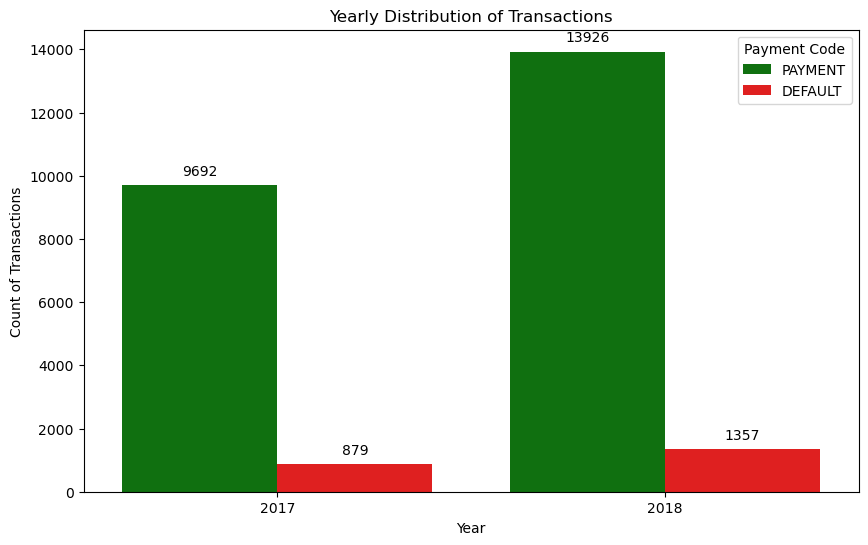

In [19]:
# Plotting yearly distribution of payment codes
plt.figure(figsize=(10, 6))
custom_palette = ['green','red']
year_ax = sns.countplot(x='year', hue='payment_code', data=df, palette=custom_palette)
plt.title('Yearly Distribution of Transactions')
plt.xlabel('Year')
plt.ylabel('Count of Transactions')
plt.legend(title='Payment Code')

for p in year_ax.patches:
    height = p.get_height()
    if pd.notna(height):
        year_ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 10),
                          textcoords='offset points')

plt.show()

The bar chart shows the yearly transactions for 2017 and 2018, comparing regular payments and defaults.

# Categories amount of payment and percentage

In [20]:
# Define bins and labels
bins = [0, 100, 500, 1000, 5000, 10000]
labels = ['0-100', '101-500', '501-1000', '1001-5000', '5001-10000']

# Create a new column 'amount_category'
df['amount_category'] = pd.cut(df['payment_amt'], bins=bins, labels=labels, right=False)

# Group by both 'payment_code' and 'amount_category'
category_summary = df.groupby(['payment_code', 'amount_category']).size().unstack(fill_value=0)

#print(category_summary)
# Assuming 'category_summary' is your DataFrame from the grouping operation
# Calculate percentage of each category within each payment code
total_by_code = category_summary.sum(axis=1)  # Total transactions per payment code
percent_summary = category_summary.divide(total_by_code, axis=0) * 100  # Percentages

print(percent_summary)

amount_category      0-100    101-500   501-1000  1001-5000  5001-10000
payment_code                                                           
DEFAULT          26.780884  42.786294  15.058611  14.968440    0.405771
PAYMENT          26.945951  39.946650  14.443764  17.133112    1.530523


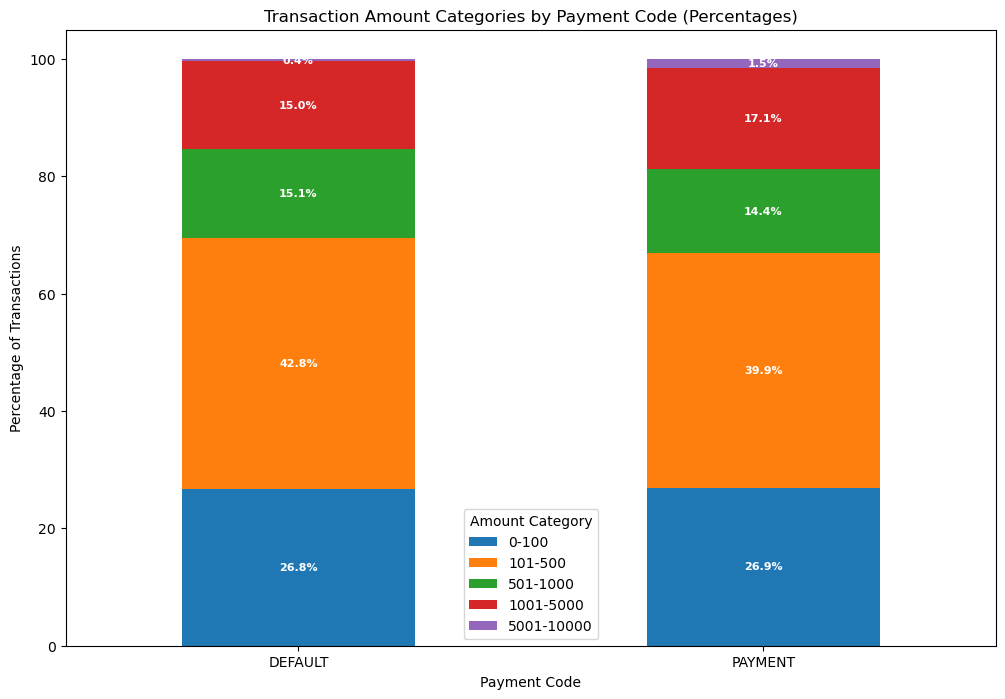

In [21]:
# Plotting the data with percentages
fig, ax = plt.subplots(figsize=(12, 8))
percent_summary.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Transaction Amount Categories by Payment Code (Percentages)')
plt.xlabel('Payment Code')
plt.ylabel('Percentage of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Amount Category')

# Adding annotations for percentages
for n, x in enumerate([p for p in ax.patches]):
    width, height = x.get_width(), x.get_height()
    x0, y0 = x.get_xy()
    ax.text(x0 + width/2, y0 + height/2, f"{height:.1f}%", ha='center', va='center', color='white', fontsize=8, weight='bold')

plt.show()


the bar chart shows the percentage of transactions within specific amount ranges for defaults and payments. It illustrates that most defaults and payments occur in lower amount ranges, with defaults slightly more frequent in the smallest category.

# Total payments made in 2017

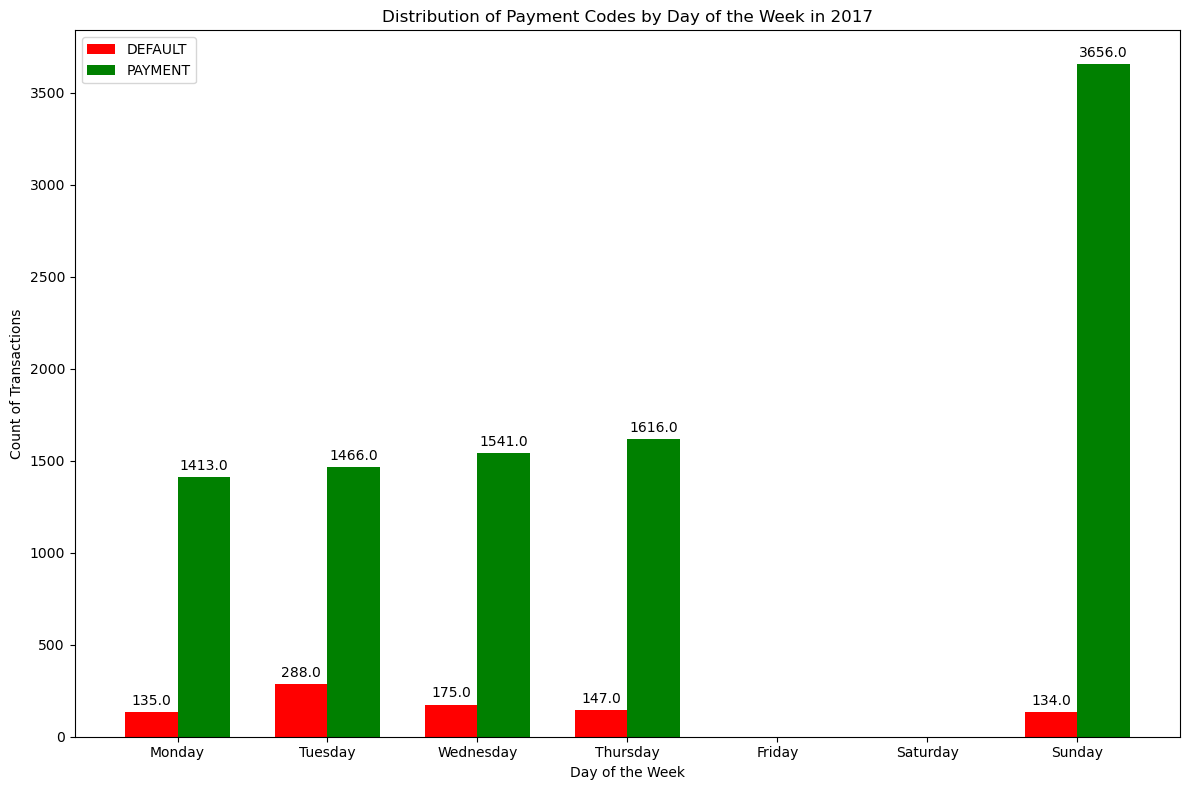

In [22]:
df_2017 = df[df['year'] == 2017].copy()

# Create a column for the day of the week using .loc
df_2017.loc[:, 'day_of_week'] = df_2017['transaction_date'].dt.day_name()

# Group by 'day_of_week' and 'payment_code'
payments_by_day = df_2017.groupby(['day_of_week', 'payment_code']).size().unstack(fill_value=0)

# Reorder the days for correct plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
payments_by_day = payments_by_day.reindex(days_order)

# Assuming df_2017 and payments_by_day have been correctly set up from previous steps
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Define the bar width
bar_width = 0.35

# Set the position of the bars
index = np.arange(len(days_order))

# Plotting DEFAULT
bars1 = plt.bar(index, payments_by_day['DEFAULT'], bar_width, label='DEFAULT', color='red')

# Plotting PAYMENT
bars2 = plt.bar(index + bar_width, payments_by_day['PAYMENT'], bar_width, label='PAYMENT', color='green')

# Adding labels and titles
plt.xlabel('Day of the Week')
plt.ylabel('Count of Transactions')
plt.title('Distribution of Payment Codes by Day of the Week in 2017')
plt.xticks(index + bar_width / 2, days_order)  # Positioning the x-axis labels in the middle of the grouped bars
plt.legend()

# Function to add a label on each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

# Call the function to add labels
add_labels(bars1)
add_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()

The bar chart shows the number of transactions for each day of the week in 2017, with regular payments being much higher than defaults every day

# Total payments made in 2018

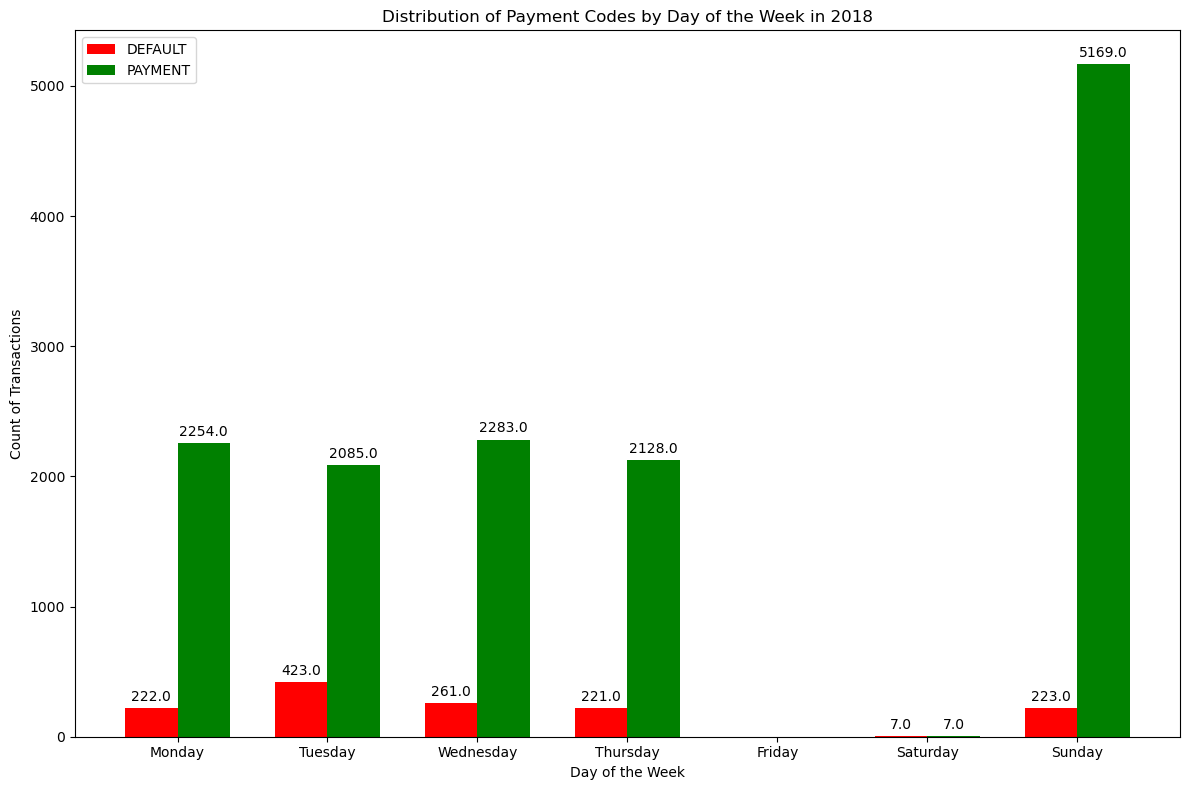

In [23]:
df_2018 = df[df['year'] == 2018].copy()

# Create a column for the day of the week using .loc
df_2018.loc[:, 'day_of_week'] = df_2018['transaction_date'].dt.day_name()

# Group by 'day_of_week' and 'payment_code'
payments_by_day = df_2018.groupby(['day_of_week', 'payment_code']).size().unstack(fill_value=0)

# Reorder the days for correct plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
payments_by_day = payments_by_day.reindex(days_order)

# Assuming df_2018 and payments_by_day have been correctly set up from previous steps
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Define the bar width
bar_width = 0.35

# Set the position of the bars
index = np.arange(len(days_order))

# Plotting DEFAULT
bars1 = plt.bar(index, payments_by_day['DEFAULT'], bar_width, label='DEFAULT', color='red')

# Plotting PAYMENT
bars2 = plt.bar(index + bar_width, payments_by_day['PAYMENT'], bar_width, label='PAYMENT', color='green')

# Adding labels and titles
plt.xlabel('Day of the Week')
plt.ylabel('Count of Transactions')
plt.title('Distribution of Payment Codes by Day of the Week in 2018')
plt.xticks(index + bar_width / 2, days_order)  # Positioning the x-axis labels in the middle of the grouped bars
plt.legend()

# Function to add a label on each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

# Call the function to add labels
add_labels(bars1)
add_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()

The chart shows the number of transactions for each day of the week in 2018, with regular payments being much higher than defaults every day

# Total payments done by days

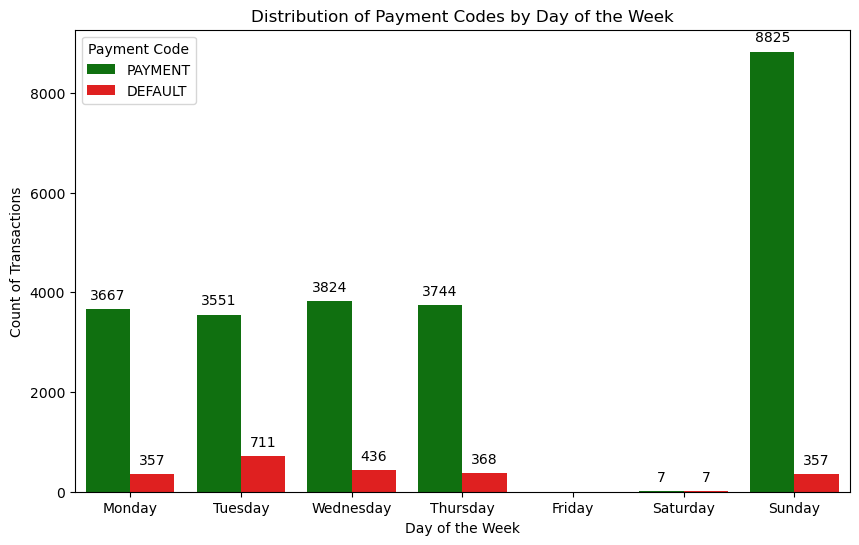

In [24]:
plt.figure(figsize=(10, 6))
custom_palette = ['green','red']
ax = sns.countplot(x='day_name', hue='payment_code', data=df, palette=custom_palette,
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Payment Codes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Transactions')
plt.legend(title='Payment Code')

for p in ax.patches:
    height = p.get_height()
    if pd.notna(height):  
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 10),
                    textcoords='offset points')
    else:
        continue  

plt.show()

The chart shows the number of transactions for each day of the week, with regular payments being much higher than defaults every day

# Transactions done by Australian Private Company that are defaults

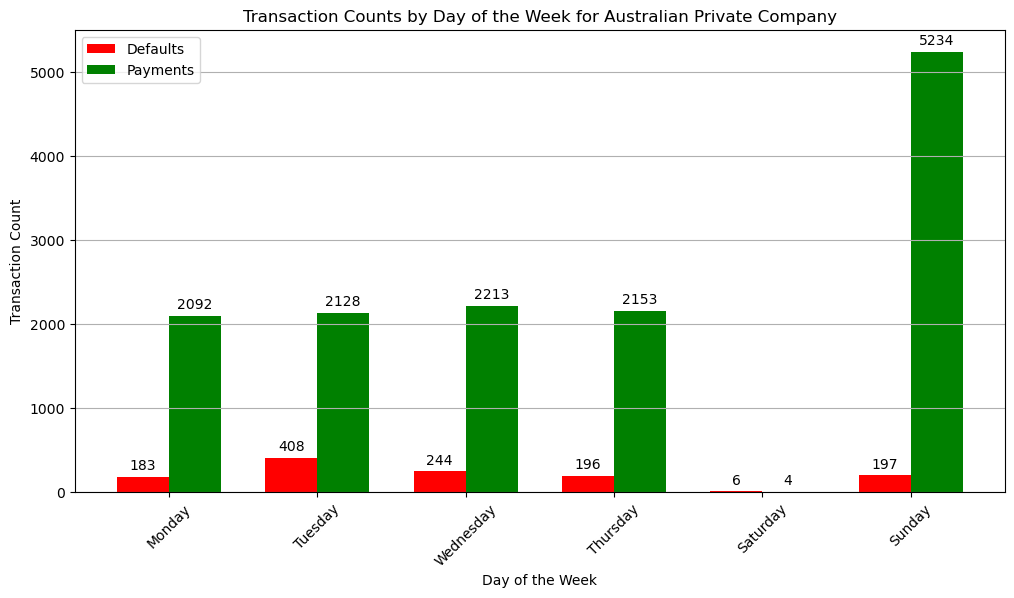

In [25]:
defaults_df = df[(df['payment_code'] == 'DEFAULT') & (df['entity_type'] == "Australian Private Company")].copy()
payments_df = df[(df['payment_code'] != 'DEFAULT') & (df['entity_type'] == "Australian Private Company")].copy()

# Create a column for the day of the week if not already present
defaults_df['day_name'] = defaults_df['transaction_date'].dt.day_name()
payments_df['day_name'] = payments_df['transaction_date'].dt.day_name()

# Group by 'day_name' and count defaults and payments
defaults_by_day = defaults_df.groupby('day_name').size().reset_index(name='count_of_defaults')
payments_by_day = payments_df.groupby('day_name').size().reset_index(name='count_of_payments')

# Merge the dataframes on 'day_name'
merged_df = pd.merge(defaults_by_day, payments_by_day, on='day_name', how='outer').fillna(0)

# Reorder the days of the week for correct plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged_df['day_name'] = pd.Categorical(merged_df['day_name'], categories=days_order, ordered=True)
merged_df = merged_df.sort_values('day_name')

# Plotting the data
plt.figure(figsize=(12, 6))
bar_width = 0.35  # Set the width of each bar
index = range(len(merged_df['day_name']))

bars1 = plt.bar(index, merged_df['count_of_defaults'], bar_width, label='Defaults', color='red')
bars2 = plt.bar([p + bar_width for p in index], merged_df['count_of_payments'], bar_width, label='Payments', color='green')

plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.title('Transaction Counts by Day of the Week for Australian Private Company')
plt.xticks([p + bar_width / 2 for p in index], merged_df['day_name'], rotation=45)
plt.legend()
plt.grid(True, axis='y')

# Add labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.show()

The chart shows the number of transactions for each day of the week for Australian Private Company, with regular payments being much higher than defaults every day

# Transactions done by Individual/Sole Trader that are defaults

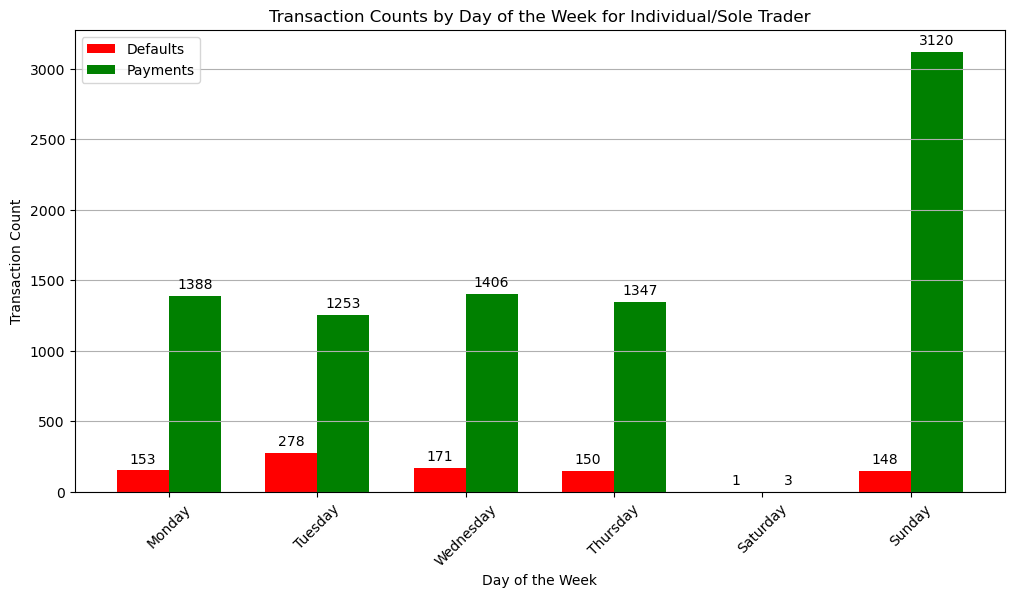

In [26]:
defaults_df = df[(df['payment_code'] == 'DEFAULT') & (df['entity_type'] == "Individual/Sole Trader")].copy()
payments_df = df[(df['payment_code'] != 'DEFAULT') & (df['entity_type'] == "Individual/Sole Trader")].copy()

# Create a column for the day of the week if not already present
defaults_df['day_name'] = defaults_df['transaction_date'].dt.day_name()
payments_df['day_name'] = payments_df['transaction_date'].dt.day_name()

# Group by 'day_name' and count defaults and payments
defaults_by_day = defaults_df.groupby('day_name').size().reset_index(name='count_of_defaults')
payments_by_day = payments_df.groupby('day_name').size().reset_index(name='count_of_payments')

# Merge the dataframes on 'day_name'
merged_df = pd.merge(defaults_by_day, payments_by_day, on='day_name', how='outer').fillna(0)

# Reorder the days of the week for correct plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged_df['day_name'] = pd.Categorical(merged_df['day_name'], categories=days_order, ordered=True)
merged_df = merged_df.sort_values('day_name')

# Plotting the data
plt.figure(figsize=(12, 6))
bar_width = 0.35  # Set the width of each bar
index = range(len(merged_df['day_name']))

bars1 = plt.bar(index, merged_df['count_of_defaults'], bar_width, label='Defaults', color='red')
bars2 = plt.bar([p + bar_width for p in index], merged_df['count_of_payments'], bar_width, label='Payments', color='green')

plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.title('Transaction Counts by Day of the Week for Individual/Sole Trader')
plt.xticks([p + bar_width / 2 for p in index], merged_df['day_name'], rotation=45)
plt.legend()
plt.grid(True, axis='y')

# Add labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.show()

The chart shows the number of transactions for each day of the week for Individual/Sole Trader, with regular payments being much higher than defaults every day

# High Number of defaults

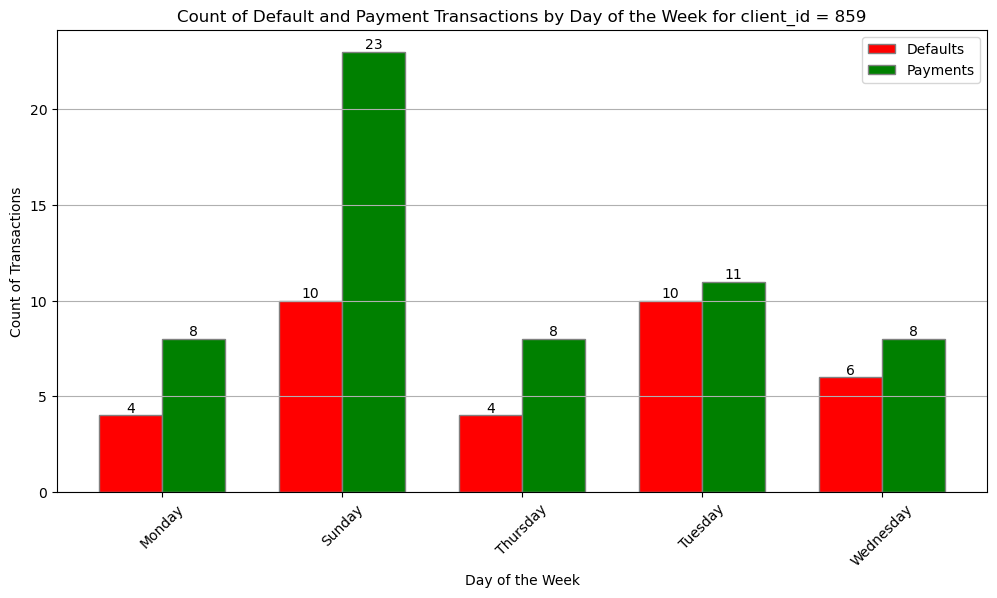

In [27]:
# Filter the DataFrame for defaults and the specific client ID
defaults_df = df[(df['payment_code'] == 'DEFAULT') & (df['client_id'] == 859)].copy()

# Create a column for the day of the week if not already present
defaults_df['day_name'] = defaults_df['transaction_date'].dt.day_name()

# Group by 'day_name' and count defaults
defaults_by_day = defaults_df.groupby('day_name').size().reset_index(name='count_of_defaults')

# Filter the DataFrame for payments and the specific client ID
payments_df = df[(df['payment_code'] == 'PAYMENT') & (df['client_id'] == 859)].copy()

# Create a column for the day of the week if not already present
payments_df['day_name'] = payments_df['transaction_date'].dt.day_name()

# Group by 'day_name' and count payments
payments_by_day = payments_df.groupby('day_name').size().reset_index(name='count_of_payments')

# Reorder the days of the week for correct plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
defaults_by_day['day_name'] = pd.Categorical(defaults_by_day['day_name'], categories=days_order, ordered=True)
payments_by_day['day_name'] = pd.Categorical(payments_by_day['day_name'], categories=days_order, ordered=True)

# Merge the two DataFrames on 'day_name'
combined_df = pd.merge(defaults_by_day, payments_by_day, on='day_name', how='outer').fillna(0)

# Plotting the data
plt.figure(figsize=(12, 6))
bar_width = 0.35
r1 = combined_df.index
r2 = [x + bar_width for x in r1]

# Create bars for defaults and payments
plt.bar(r1, combined_df['count_of_defaults'], color='red', width=bar_width, edgecolor='grey', label='Defaults')
plt.bar(r2, combined_df['count_of_payments'], color='green', width=bar_width, edgecolor='grey', label='Payments')

# Add labels
plt.title('Count of Default and Payment Transactions by Day of the Week for client_id = 859')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Transactions')
plt.xticks([r + bar_width / 2 for r in range(len(combined_df))], combined_df['day_name'])
plt.legend()

# Add data labels
for i in range(len(r1)):
    plt.text(r1[i], combined_df['count_of_defaults'][i], str(int(combined_df['count_of_defaults'][i])), ha='center', va='bottom')
for i in range(len(r2)):
    plt.text(r2[i], combined_df['count_of_payments'][i], str(int(combined_df['count_of_payments'][i])), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, axis='y')  # Add grid lines only for y-axis

plt.show()


The chart shows the weekly distribution of defaults and payments for client ID 859, with payments consistently outnumbering defaults. The highest activity, for both defaults and payments, occurs on Sunday.

# Categories the defaulters based on number of Defaults

Number of clients in each default category:


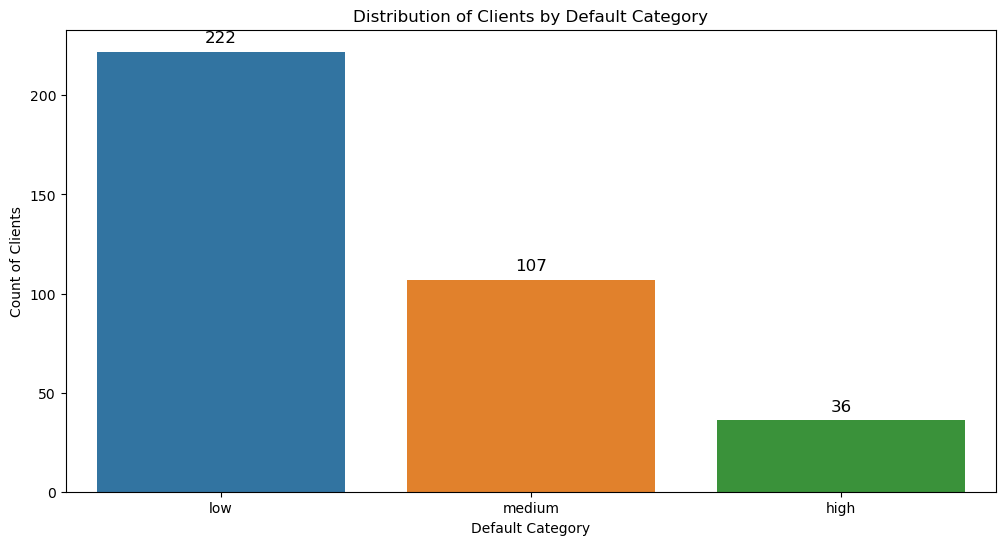

In [28]:
## Filter the merged DataFrame for default payments
default_payments_df = df[df['payment_code'] == 'DEFAULT']

# Group by 'client_id' and count the number of defaults
client_default_counts = default_payments_df.groupby('client_id').size().reset_index(name='count_of_defaults')

# Categorize the clients based on the number of defaults
def categorize_defaults(count):
    if count <= 5:
        return 'low'
    elif 5 < count < 15:
        return 'medium'
    else:
        return 'high'

client_default_counts['default_category'] = client_default_counts['count_of_defaults'].apply(categorize_defaults)

# Count the number of clients in each default category
category_counts = client_default_counts['default_category'].value_counts().reset_index()
category_counts.columns = ['default_category', 'count']

# Display the results
print("Number of clients in each default category:")
category_counts

# Plot the results with counts on the bars
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=client_default_counts, x='default_category', order=['low', 'medium', 'high'])
plt.title('Distribution of Clients by Default Category')
plt.xlabel('Default Category')
plt.ylabel('Count of Clients')

# Add counts on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()


The chart categorizes clients based on their default risk, displaying 222 clients in the low category, 107 in the medium category, and 36 in the high category. This visualization highlights that most clients fall into the low default risk category.

# High Defaulters >=15

In [29]:
# Filter the merged DataFrame for default payments
default_payments_df = df[df['payment_code'] == 'DEFAULT']

# Group by 'client_id' and 'entity_type', and sum the defaulted amounts
default_amounts = default_payments_df.groupby(['client_id', 'entity_type'])['payment_amt'].sum().reset_index()

# Further categorize and analyze if needed
client_default_counts = default_payments_df.groupby('client_id').size().reset_index(name='count_of_defaults')

# Categorize the clients based on the number of defaults
def categorize_defaults(count):
    if count <= 5:
        return 'low'
    elif 5 < count < 15:
        return 'medium'
    else:
        return 'high'

client_default_counts['default_category'] = client_default_counts['count_of_defaults'].apply(categorize_defaults)

# Filter for high defaulters
high_defaulters = client_default_counts[client_default_counts['default_category'] == 'high']

# Merge high defaulters with default amounts
high_defaulters_with_amounts = pd.merge(high_defaulters, default_amounts, on='client_id', how='left')

# Filter the merged DataFrame for payments (excluding defaults)
payments_only_df = df[df['payment_code'] != 'DEFAULT']

# Group by 'client_id' and 'entity_type', and sum the payment amounts
payment_amounts = payments_only_df.groupby(['client_id', 'entity_type'])['payment_amt'].sum().reset_index()

# Merge the payment amounts with the high defaulters
high_defaulters_with_payments = pd.merge(high_defaulters_with_amounts, payment_amounts, on=['client_id', 'entity_type'], how='left', suffixes=('_defaulted', '_paid'))

# Display the high defaulters with their total defaulted and paid amounts
high_defaulters_with_payments = high_defaulters_with_payments[['client_id', 'count_of_defaults', 'default_category', 'entity_type', 'payment_amt_defaulted', 'payment_amt_paid']]

high_defaulters_with_payments.sort_values(by='count_of_defaults', ascending=False).head()


,client_id,count_of_defaults,default_category,entity_type,payment_amt_defaulted,payment_amt_paid
31,859.0,34,high,Australian Private Company,34732.95,82762.86
14,413.0,32,high,Australian Private Company,28551.98,69215.22
36,1124.0,27,high,Australian Private Company,3131.29,11904.53
4,231.0,26,high,Individual/Sole Trader,4102.14,7044.64
35,995.0,25,high,Australian Private Company,1661.25,2917.50


The dataframe lists clients identified as high-risk due to their high number of defaults, who have defaults more than 15 times, detailing their entity types, the total amount they defaulted on, and how much they paid. Most of these high-risk clients are classified as Australian Private Companies, with varying amounts of defaulted and paid sums.

In [30]:
high_defaulters_with_payments.payment_amt_defaulted.sum()

341925.32

total defaulted amount is 341925.32

In [31]:
high_defaulters_with_payments.payment_amt_paid.sum()

967689.07

total amount paid by high_defaulters is 967689.07

# Medium Defaulters <=15 

In [32]:
medium_defaulters = client_default_counts[client_default_counts['default_category'] == 'medium']

medium_defaulters_with_amounts = pd.merge(medium_defaulters, default_amounts, on='client_id', how='left')

payments_only_df = df[df['payment_code'] != 'DEFAULT']

payment_amounts = payments_only_df.groupby(['client_id', 'entity_type'])['payment_amt'].sum().reset_index()

medium_defaulters_with_payments = pd.merge(medium_defaulters_with_amounts, payment_amounts, on=['client_id', 'entity_type'], how='left', suffixes=('_defaulted', '_paid'))

medium_defaulters_with_payments = medium_defaulters_with_payments[['client_id', 'count_of_defaults', 'default_category', 'entity_type', 'payment_amt_defaulted', 'payment_amt_paid']]

medium_defaulters_with_payments.sort_values(by='count_of_defaults', ascending=False).head()

,client_id,count_of_defaults,default_category,entity_type,payment_amt_defaulted,payment_amt_paid
106,1195.0,14,medium,Discretionary Investment Trust,111620.00,172656.59
91,953.0,14,medium,Individual/Sole Trader,6766.62,24649.86
25,281.0,14,medium,Individual/Sole Trader,2940.54,6540.54
69,753.0,14,medium,Australian Private Company,13533.31,84616.55
7,105.0,14,medium,Individual/Sole Trader,6050.00,10250.00


Medium defaulters who have defaulted less than 15 times

In [33]:
medium_defaulters_with_payments.client_id.count()

107

In [34]:
medium_defaulters_with_payments.payment_amt_defaulted.sum()

559579.5

total defaulted amount is 559579.5

In [35]:
medium_defaulters_with_payments.payment_amt_paid.sum()

2579354.34

total amount paid by medium_defaulters is 2579354.34

# Low defaulters <=5

In [36]:

low_defaulters = client_default_counts[client_default_counts['default_category'] == 'low']

low_defaulters_with_amounts = pd.merge(low_defaulters, default_amounts, on='client_id', how='left')

payments_only_df = df[df['payment_code'] != 'DEFAULT']

payment_amounts = payments_only_df.groupby(['client_id', 'entity_type'])['payment_amt'].sum().reset_index()

low_defaulters_with_payments = pd.merge(low_defaulters_with_amounts, payment_amounts, on=['client_id', 'entity_type'], how='left', suffixes=('_defaulted', '_paid'))

low_defaulters_with_payments = low_defaulters_with_payments[['client_id', 'count_of_defaults', 'default_category', 'entity_type', 'payment_amt_defaulted', 'payment_amt_paid']]

low_defaulters_with_payments.sort_values(by='count_of_defaults', ascending=False).head()

,client_id,count_of_defaults,default_category,entity_type,payment_amt_defaulted,payment_amt_paid
44,297.0,5,low,Australian Private Company,6000.00,47675.00
138,767.0,5,low,Australian Private Company,6058.34,16857.00
88,490.0,5,low,Australian Private Company,2300.01,12350.01
198,1128.0,5,low,Australian Private Company,700.00,37806.70
211,1198.0,5,low,Individual/Sole Trader,950.24,7200.72


low defaulters who have defaulted less than or equal to 5 times

In [37]:
low_defaulters_with_payments.client_id.count()

222

In [38]:
low_defaulters_with_payments.payment_amt_defaulted.sum()

605251.05

Total defaulted amount is 605251.05

In [39]:
low_defaulters_with_payments.payment_amt_paid.sum()

4964444.629999999

Total amount paid by low_defaulters is 4964444.629999999

# Sum of Defaulter Categories

In [40]:
# Sum the defaulted amounts for each category
total_low_defaulted = low_defaulters_with_payments['payment_amt_defaulted'].sum()
total_medium_defaulted = medium_defaulters_with_payments['payment_amt_defaulted'].sum()
total_high_defaulted = high_defaulters_with_payments['payment_amt_defaulted'].sum()

# Calculate the total payments made
total_payments = df[df['payment_code'] == 'PAYMENT']['payment_amt'].sum()

# Calculate the sum of the defaulted amounts divided by the total payments
sum_defaulted_amounts = total_low_defaulted + total_medium_defaulted + total_high_defaulted
percentage_defaulted = (sum_defaulted_amounts / total_payments) * 100

print(f"Total defaulted amount by low defaulters: {total_low_defaulted}")
print(f"Total defaulted amount by medium defaulters: {total_medium_defaulted}")
print(f"Total defaulted amount by high defaulters: {total_high_defaulted}")
print(f"Overall total payments: {total_payments}")
print(f"Percentage of total payments defaulted: {percentage_defaulted:.2f}%")


Total defaulted amount by low defaulters: 605251.05
Total defaulted amount by medium defaulters: 559579.5
Total defaulted amount by high defaulters: 341925.32
Overall total payments: 30178687.470000003
Percentage of total payments defaulted: 4.99%


# Defaulted amount and percentage

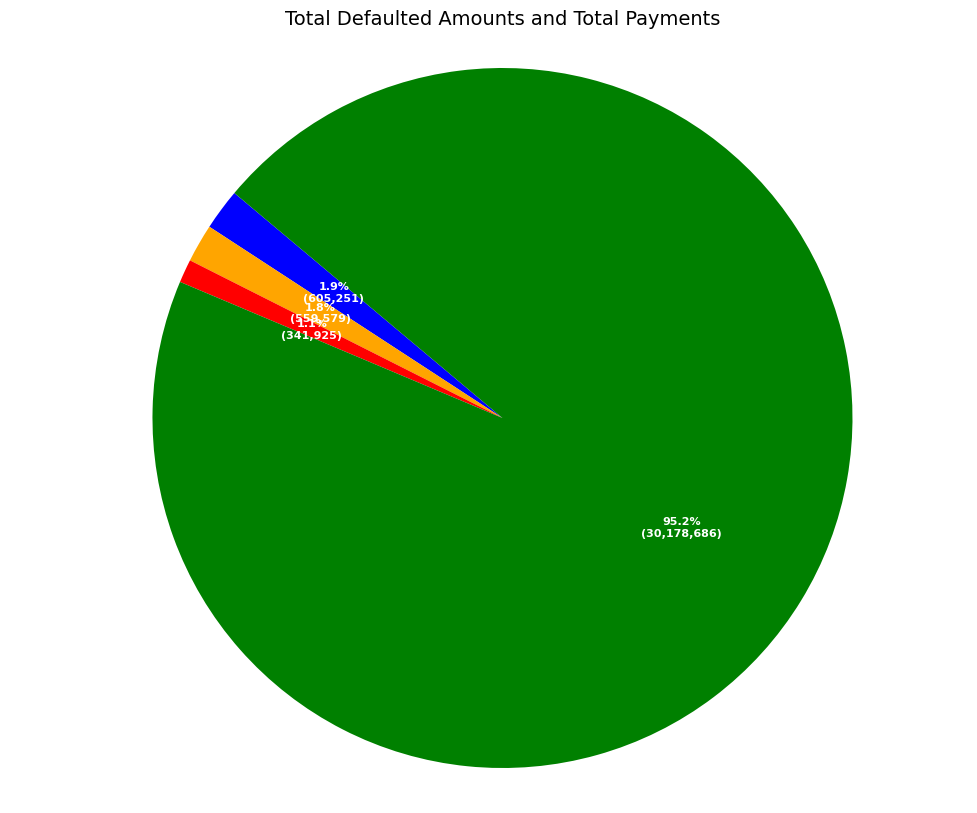

In [41]:
labels = ['Low Defaulters', 'Medium Defaulters', 'High Defaulters', 'Total Payments']
values = [total_low_defaulted, total_medium_defaulted, total_high_defaulted, total_payments]

# Define function to format the labels
def format_label(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{pct:.1f}%\n({absolute:,d})"

# Plotting the Pie Chart
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(values, labels=labels, autopct=lambda pct: format_label(pct, values),
                                   startangle=140, colors=['blue', 'orange', 'red', 'green'], textprops=dict(color="w"))

# Adding more properties to make it visually appealing
plt.setp(autotexts, size=8, weight="bold")
plt.setp(texts, size=12)
plt.title('Total Defaulted Amounts and Total Payments', size=14)
plt.axis('equal')

plt.show()

The pie chart visualizes the total payments made, with 95.2% ($30,178,686) representing successful payments and 4.99% divided among defaulted amounts: 1.9% ($605,251) for low, 1.8% ($559,579) medium, and 1.1% ($341,925) for high defaulters. This illustrates the proportion of defaults compared to the total payments made.

# Default, Payment amount in 2017 and 2018

In [42]:
# Filter the DataFrame for defaults and payments

defaults_df = df[df['payment_code'] == 'DEFAULT']
payments_df = df[df['payment_code'] == 'PAYMENT']

# Calculate total amount of defaults and Payments for 2017

defaults_2017 = defaults_df[defaults_df['transaction_date'].dt.year == 2017]
payments_2017 = payments_df[payments_df['transaction_date'].dt.year == 2017]
total_defaults_2017 = defaults_2017['payment_amt'].sum()
total_payments_2017 = payments_2017['payment_amt'].sum()


# Calculate total amount of defaults and Payments for 2018

defaults_2018 = defaults_df[defaults_df['transaction_date'].dt.year == 2018]
payments_2018 = payments_df[payments_df['transaction_date'].dt.year == 2018]
total_defaults_2018 = defaults_2018['payment_amt'].sum()
total_payments_2018 = payments_2018['payment_amt'].sum()

# Display the results

print(f'Total amount of defaults in 2017: {total_defaults_2017}')
print(f'Total amount of payments in 2017: {total_payments_2017}')
print(f'Total amount of defaults in 2018: {total_defaults_2018}')
print(f'Total amount of payments in 2018: {total_payments_2018}')


Total amount of defaults in 2017: 403486.68
Total amount of payments in 2017: 9100778.43
Total amount of defaults in 2018: 1103269.19
Total amount of payments in 2018: 21077909.04


In [43]:
df

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,entity_type,entity_year_established,day_name,year,month,day,amount_category
0,20175,927.0,1.0,2018-05-22 18:08:31,66.66,PAYMENT,Other Partnership,2006,Tuesday,2018,5,22,0-100
1,8485,927.0,1.0,2017-11-26 17:08:15,66.66,PAYMENT,Other Partnership,2006,Sunday,2017,11,26,0-100
2,13778,927.0,1.0,2018-02-22 17:08:23,66.66,PAYMENT,Other Partnership,2006,Thursday,2018,2,22,0-100
3,22768,927.0,1.0,2018-06-24 18:08:44,66.66,PAYMENT,Other Partnership,2006,Sunday,2018,6,24,0-100
4,15698,927.0,1.0,2018-03-22 17:08:24,66.66,PAYMENT,Other Partnership,2006,Thursday,2018,3,22,0-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25849,25075,1603.0,1280.0,2018-07-19 18:09:24,1666.68,PAYMENT,Australian Private Company,2016,Thursday,2018,7,19,1001-5000
25850,24711,1603.0,1280.0,2018-07-16 18:09:20,0.01,PAYMENT,Australian Private Company,2016,Monday,2018,7,16,0-100
25851,25076,1603.0,1280.0,2018-07-19 18:09:24,64.99,PAYMENT,Australian Private Company,2016,Thursday,2018,7,19,0-100
25852,25132,1627.0,1281.0,2018-07-22 18:08:06,0.01,PAYMENT,Australian Private Company,2012,Sunday,2018,7,22,0-100
